In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
import numpy as np
data = pd.read_csv('MiniBooNE_PID.txt', skiprows = 1,delim_whitespace =True, header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.37300,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.95970,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.56080,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.45860,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.96000,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130059,4.80718,1.451020,174.6920,0.343481,0.002174,0.000000,0.747401,0.725617,3.18501,0.152208,...,179.832,-2.74376,0.317051,2.67617,0.000000,0.141958,0.723207,7.446300,3.219320,0.299487
130060,5.00527,1.501860,129.9270,0.273477,0.006098,0.109769,1.325370,0.830334,3.40836,0.130794,...,120.794,-24.72180,0.312652,4.16524,0.000000,0.232273,0.141153,1.898750,1.778180,0.258058
130061,3.10842,2.178140,56.3651,0.211850,0.000000,0.167382,1.318900,0.870681,3.43055,0.279588,...,83.082,-34.31190,0.360148,8.16491,0.000000,0.124182,0.016155,0.789276,0.730342,0.152876
130062,5.44560,1.845700,103.4630,0.287411,0.015929,0.107495,0.679931,0.786533,3.47714,0.193390,...,170.225,16.61940,0.164154,5.83085,0.000000,0.193383,-0.397099,2.872590,0.819867,0.210619


### 1.Train-test split

In [2]:
#τα γεγονοτα σηματος αποθηκευονται στο sig και υποβαθρου το pkg
sig = data[0:36500]
bkg = data[36500:]
sig = sig[sig[0] > -500.0]
bkg = bkg[bkg[0] > -500.0] 
from sklearn.model_selection import train_test_split
train_sig, test_sig = train_test_split(sig, train_size = 18000,  test_size =18000 )
train_bkg, test_bkg = train_test_split(bkg,train_size =18000,test_size=18000)

### 2.train Histogram

In [86]:
#dont run this!!! it has been run!
for i in range(50):
    plt.hist([train_sig[i],train_bkg[i]], bins = 50,label = ["signal", "backround"])
    title = "variable" + str(i+1)
    plt.title(title)
    plt.legend(loc='upper right')
    savefile = 'histograms/metavliti' + str(i+1) + '.jpg'
    plt.savefig(savefile)
    plt.close()

<AxesSubplot:>

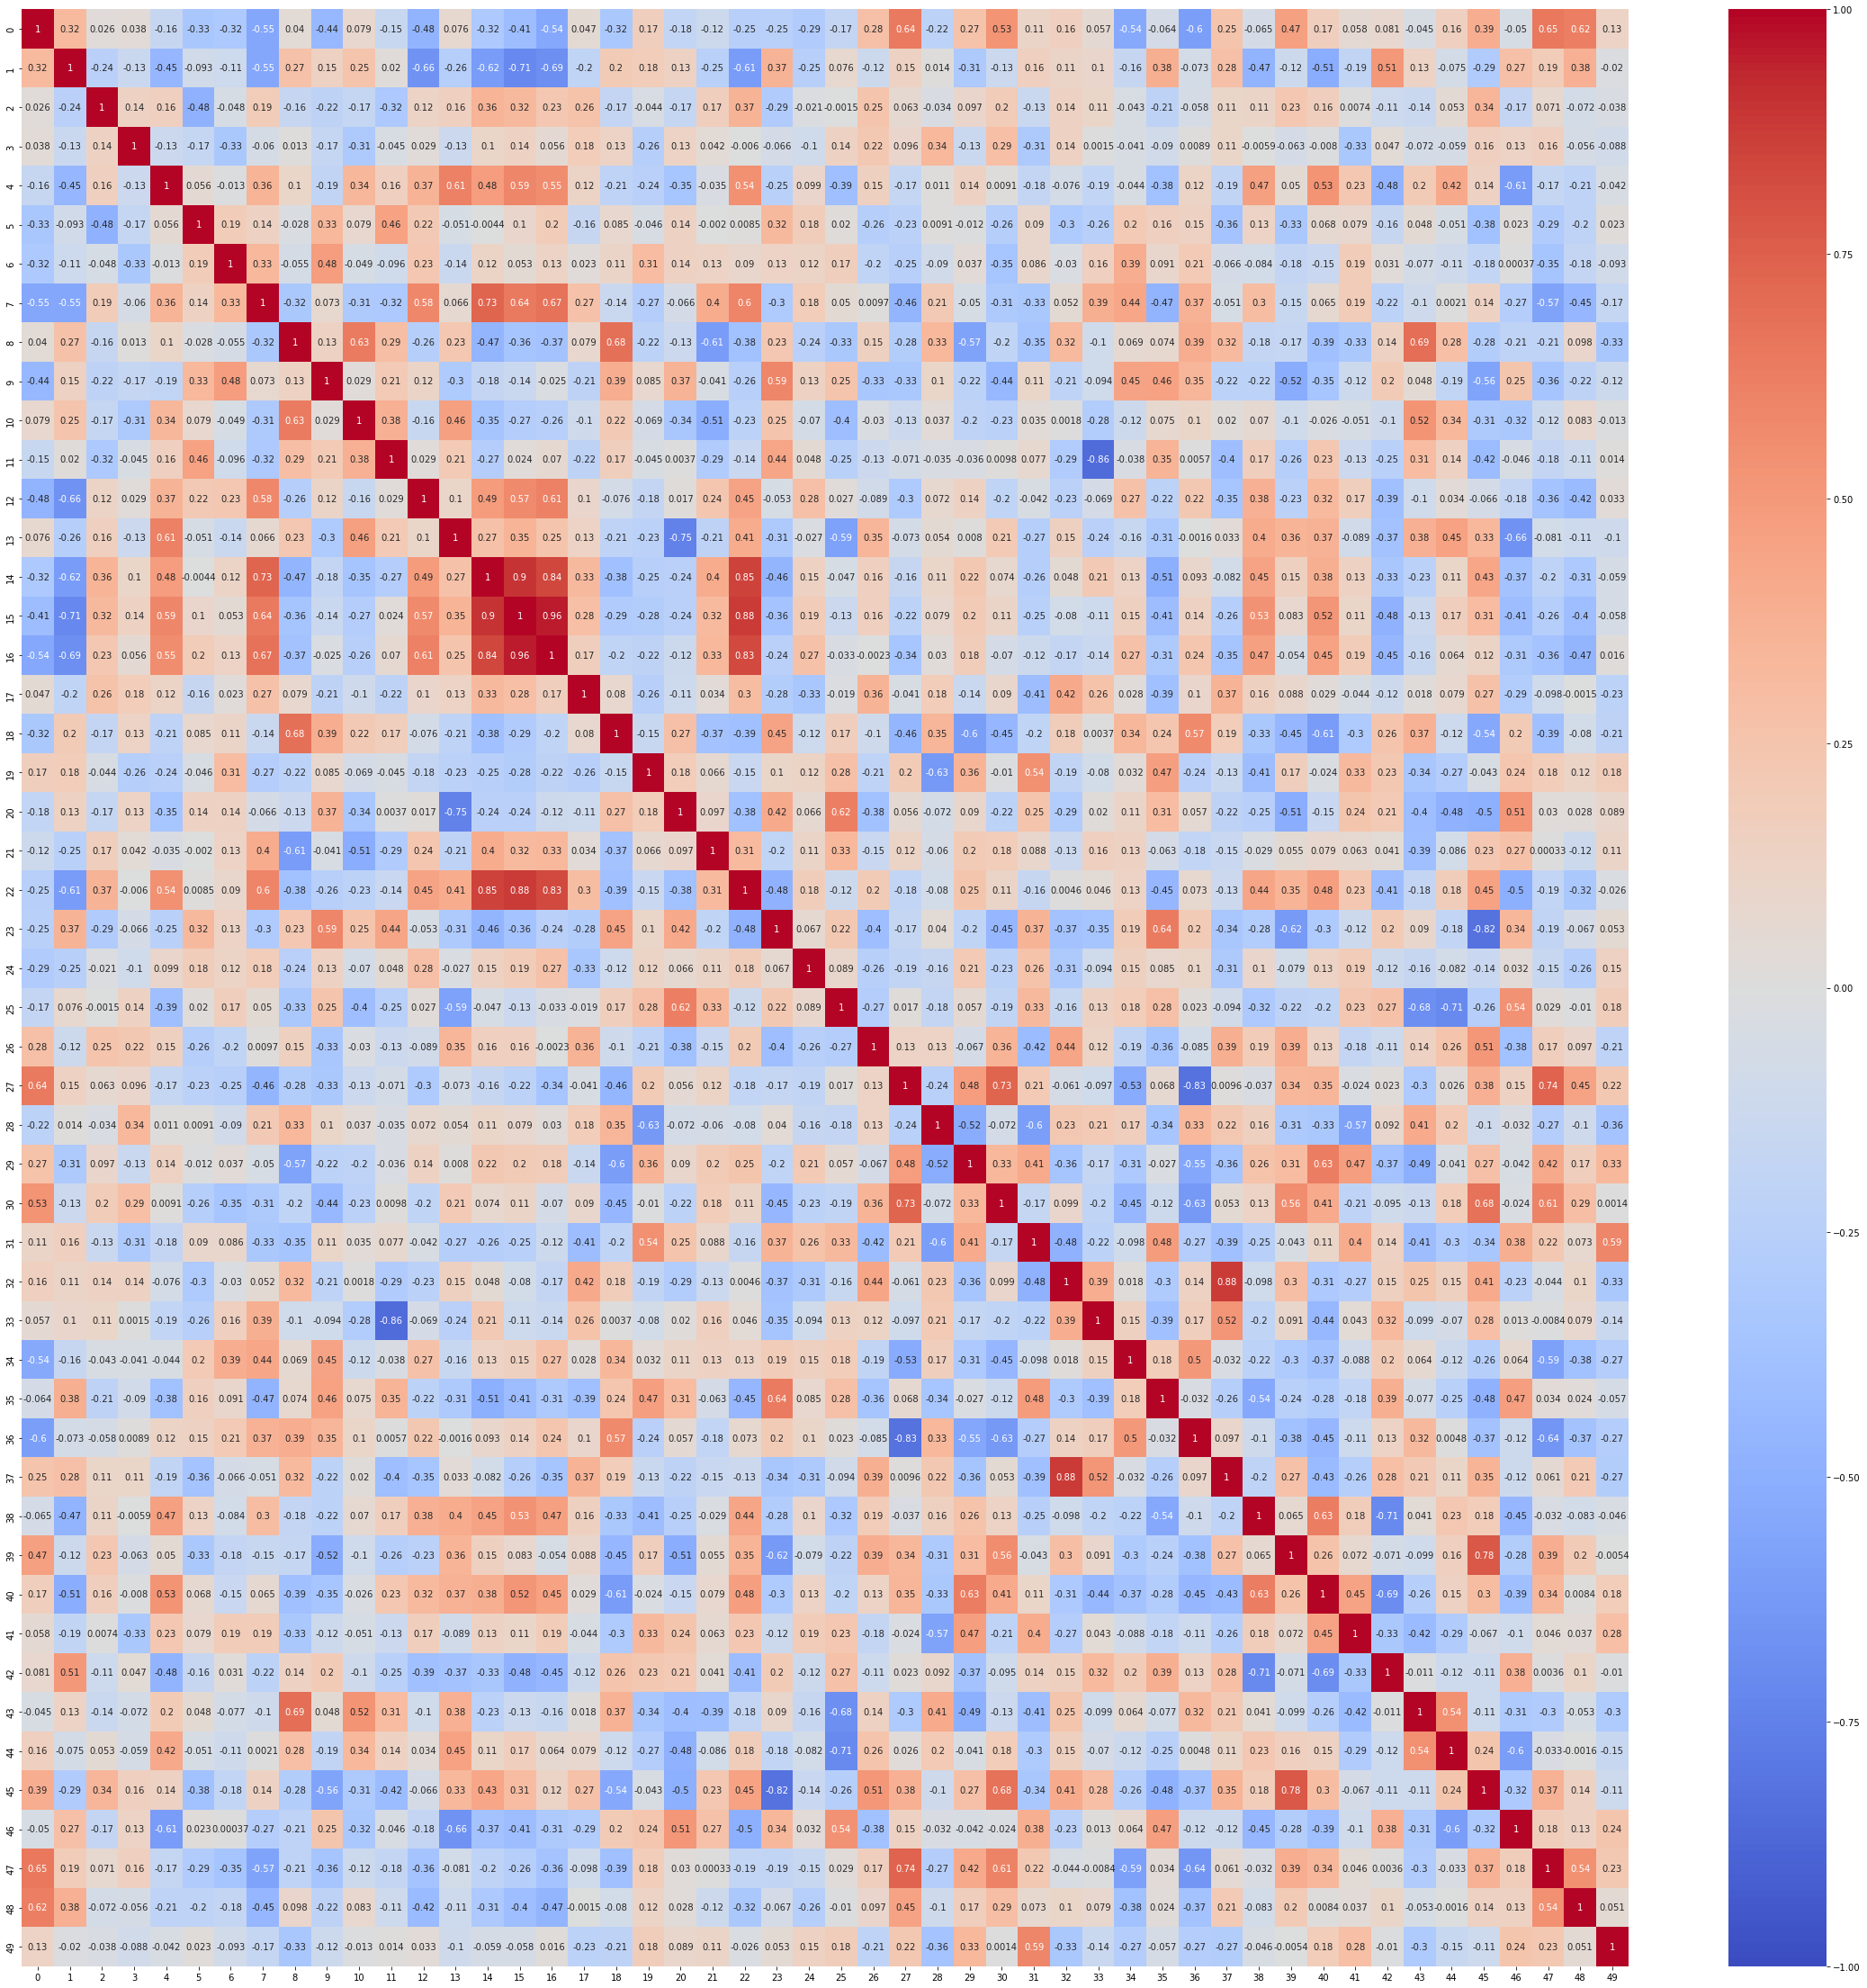

In [3]:
#corelation headmaps
corrTrain_sig = train_sig.corr()
corrTrain_bkg = train_bkg.corr()
plt.figure(figsize = (40,40))
seaborn.heatmap(corrTrain_sig,annot = True, vmin= -1,vmax = 1,cmap = 'coolwarm')


<AxesSubplot:>

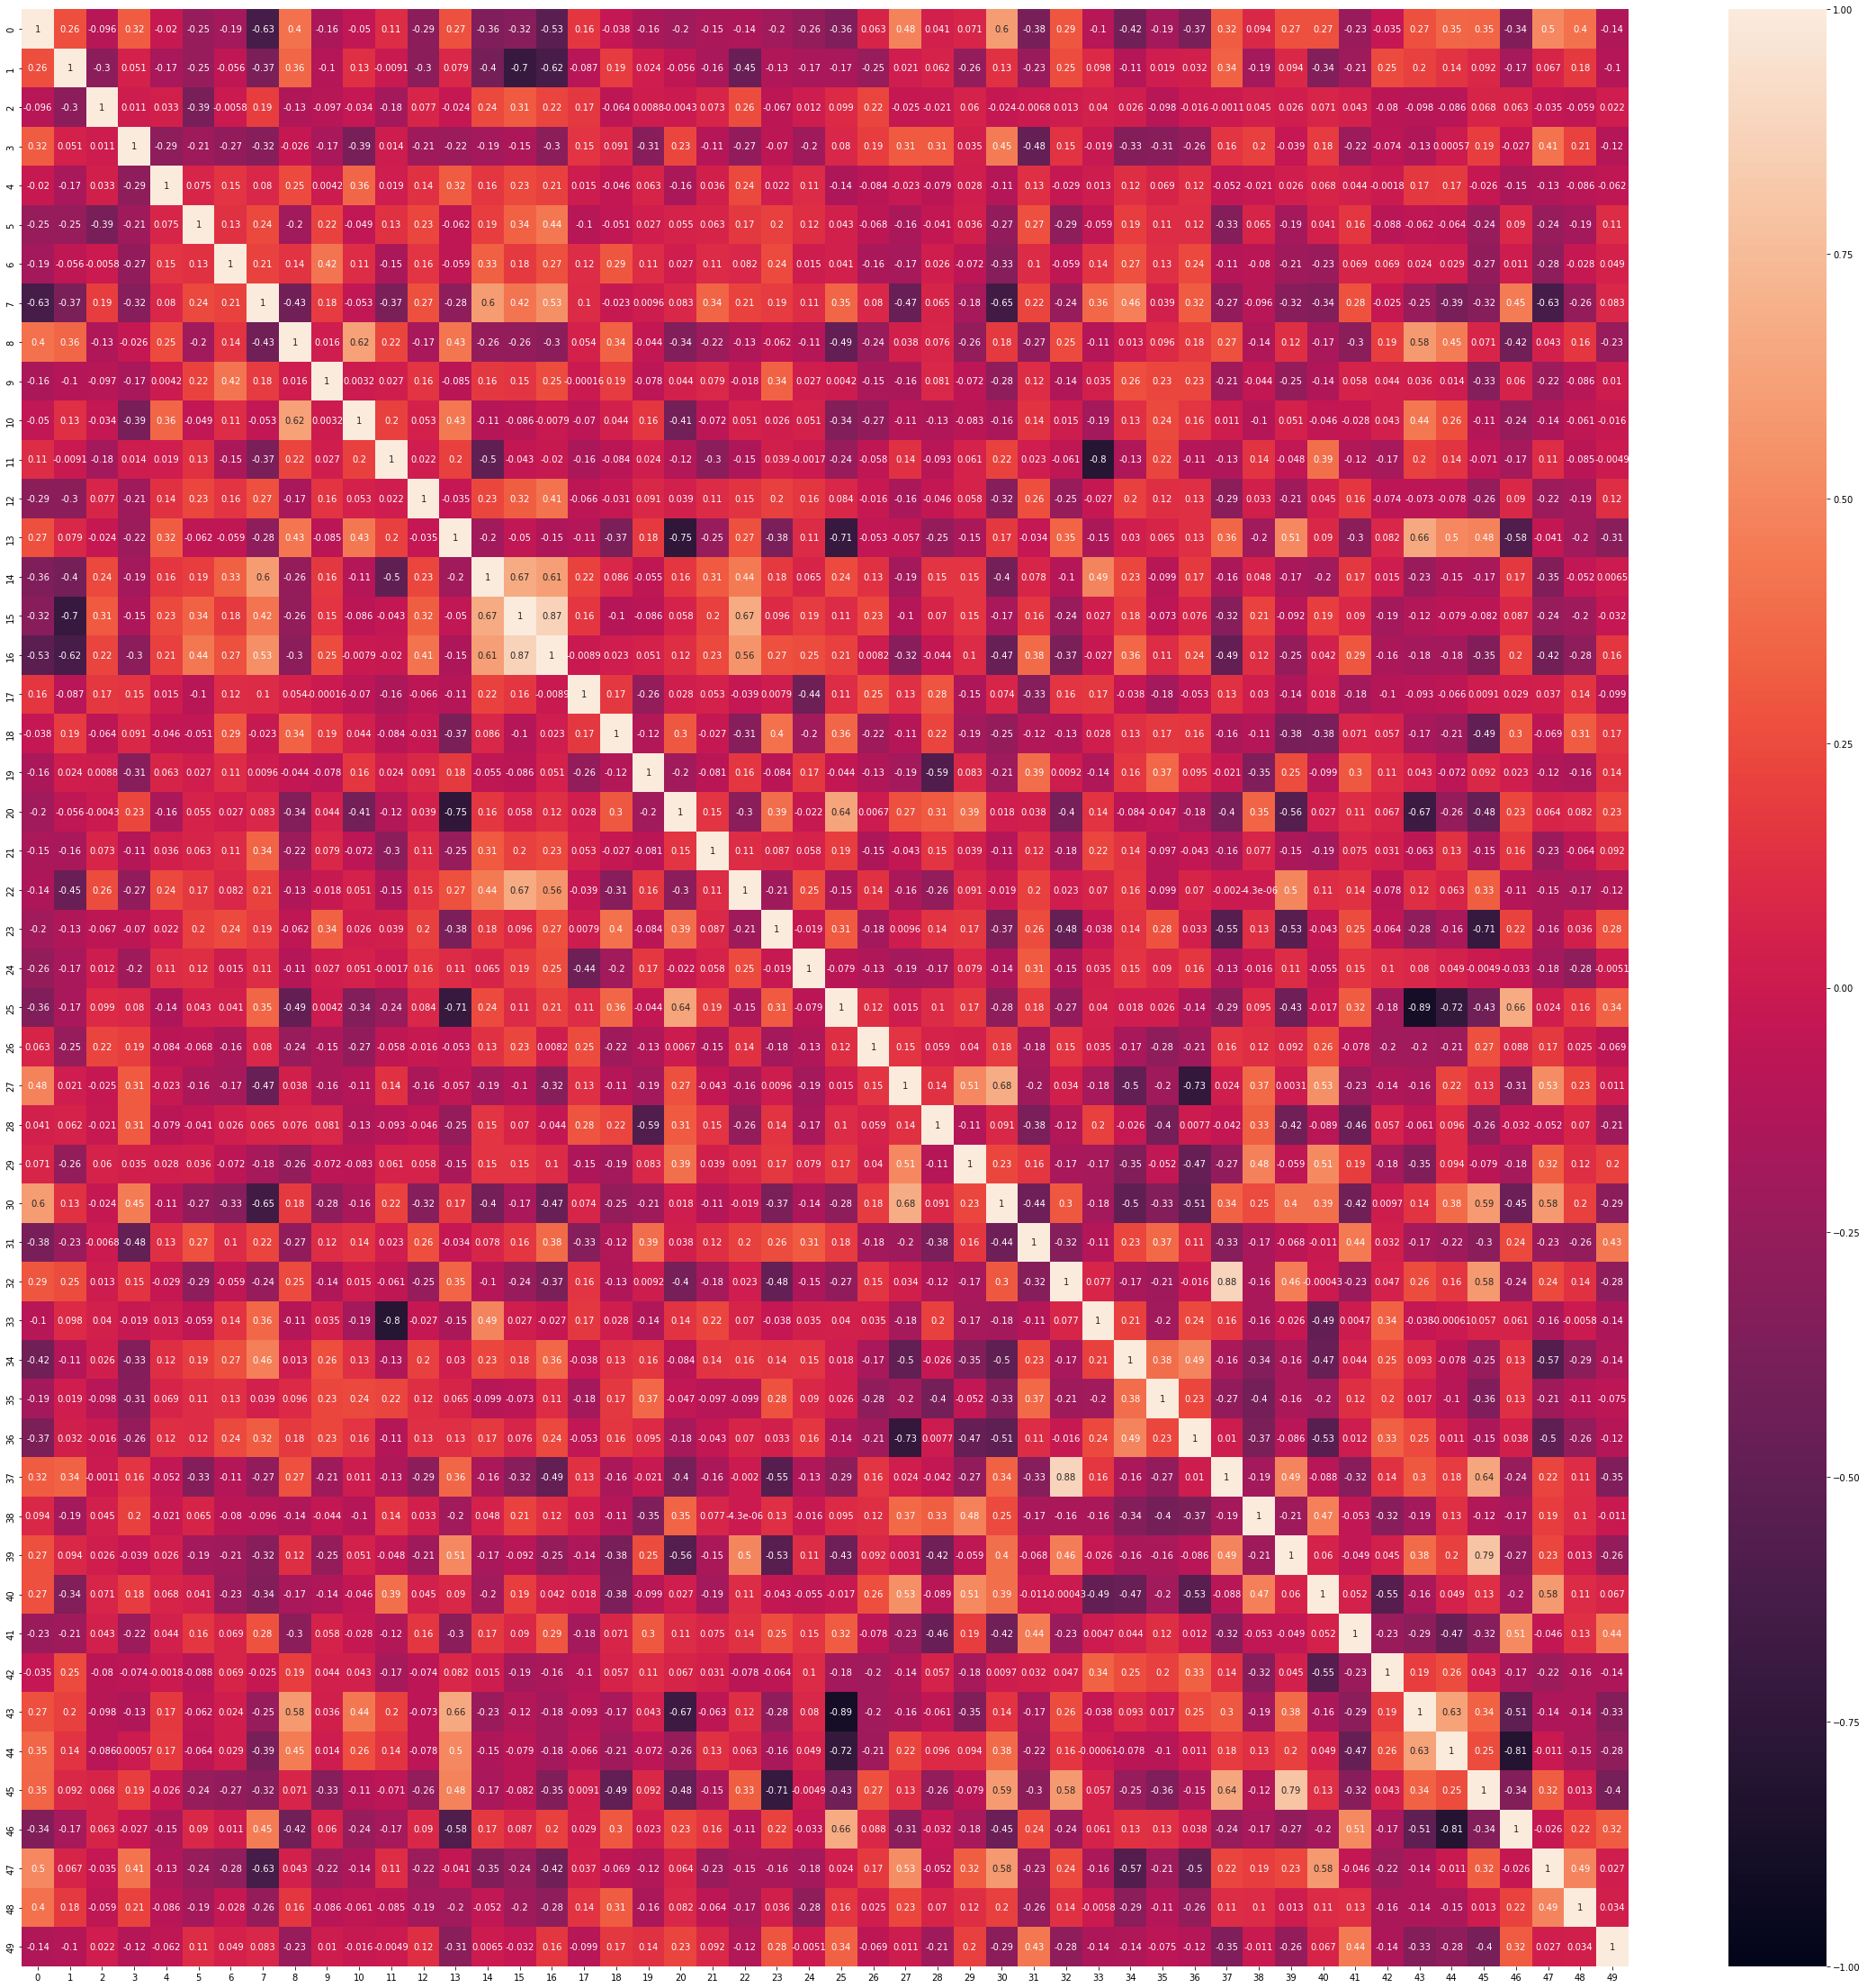

In [4]:
plt.figure(figsize = (40,40))
seaborn.heatmap(corrTrain_bkg,annot = True, vmin = -1, vmax = 1)

In [5]:
#erothma 4 
from sklearn.preprocessing import StandardScaler
data_train = np.concatenate((train_sig,train_bkg))
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)


from sklearn.decomposition import PCA
pca = PCA()
data_train_scaled_transformed = pca.fit_transform(data_train_scaled)





In [17]:
cov_matrix = np.cov(data_train)
eigenvalues , eigenvectors = eig(cov_matrix)

MemoryError: Unable to allocate 9.66 GiB for an array with shape (36000, 36000) and data type float64